# Logistic Regression

This notebook will go through a machine learning implementation of Logistic Regression, as well as implementing Regularization within the model.

### Setup

First let's import some data, and view it.

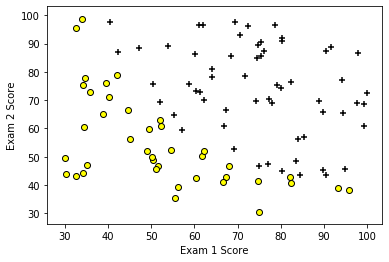

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('data/ex2data1.txt',delimiter=',',
                 header=None,
                 names=['Exam Score 1','Exam Score 2','Pass or Fail'])
pass_df = df[df['Pass or Fail']==1]
fail_df = df[df['Pass or Fail']==0]

plt.scatter(pass_df['Exam Score 1'], pass_df['Exam Score 2'], marker='+', color='black')
plt.scatter(fail_df['Exam Score 1'], fail_df['Exam Score 2'], marker='o', color='yellow', edgecolors='black')
plt.ylabel('Exam 2 Score')
plt.xlabel('Exam 1 Score')
plt.show()

Now let's convert our data into a numpy matrix, so we can easily vectorize our calculations.

In [2]:
X = np.asmatrix(df[['Exam Score 1', 'Exam Score 2']].to_numpy())
Y = np.asmatrix(df['Pass or Fail'].to_numpy())
# Transpose Y so the rows represent the number of training examples
Y = Y.T

## Logistic Regression

### Model

In Logistic Regression our hypothesis function is defined as:
\begin{equation*}
h_{\theta}(x) = g(\theta x)
\end{equation*}
Where the function g is the sigmoid function:
\begin{equation*}
g(z) = \frac{1}{1+e^{-z}}
\end{equation*}

In code this is:

In [3]:
def sigmoid(z):
   return (1 / (1 + np.exp(-z)))

### Cost Function

We define our cost $J$ as a function of $\theta$ below, where $m$ is the number of training datasets, and $x^{(i)}$ & $y^{(i)}$ refers to the $i^{th}$ training dataset datapoint for $x$ and $y$ respectively.
\begin{equation*}
J(\theta) = \frac{1}{m} \sum_{i=1}^m \Bigl[\, -y^{(i)} \log(h_{\theta}(x^{(i)})) + (1+y^{(i)})\log(1-h_{\theta}(x^{(i)})) \Bigr]\,
\end{equation*}
By defining $X_{(m,n)}$ as a matrix with our labelled dataset with $m$ datapoints and $n$ features, $Y_{(m,1)}$ containing our labelled data, and $H$ as our hypothesis matrix, we can use the vectorized form defined below as an efficient implementation of the cost function calculation.
\begin{equation*}
J(\theta) = \frac{1}{m} \Bigl( -Y^{T}\log{(H)}-(1-Y)^{T}\log{(1-H)}\Bigr)
\end{equation*}
Where
\begin{equation*}
H = g(\theta^{T} X)
\end{equation*}

### Gradient

The gradient $\nabla J(\theta)$ is defined as:

\begin{equation*}
\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}
\end{equation*}

Of which the vectorized form becomes:

\begin{equation*}
\nabla J(\theta) = \frac{1}{m} X^{T}(H-Y)
\end{equation*}

We've defined these in code below.

In [4]:
def cost(theta, X, Y):
    # Convert theta from numpy.ndarray to matrix
    theta = np.matrix(theta)
    # Get hypothesis
    h = sigmoid(X*theta.T)
    m,n = X.shape
    # Calculate cost
    J = (1/m)*(-Y.T * np.log(h) - (1-Y).T * np.log(1-h))
    return J.item()

def gradient(theta, X, Y):
    # Convert theta from numpy.ndarray to matrix
    theta = np.matrix(theta)
    # Get hypothesis
    h = sigmoid(X*theta.T)
    m,n = X.shape
    # Calculate gradient
    grad = (1/m)* X.T*(h-Y)
    
    return grad

### Example

We can now test our implementation, let's start by calculating the cost of some initial $\theta$.

In [5]:
# Initialize variables

# Add column of 1s to the matrix X
ones = np.transpose(np.matrix(np.ones(len(X))))
X_h = np.hstack((ones, X))
m,n = X_h.shape
# Initialize theta
theta = np.zeros(n)
# Calculate the cost and the gradient
J = cost(theta, X_h, Y)
grad = gradient(theta, X_h, Y)
print('The cost of a theta {0} is: {1:.3f}'.format(theta,J))
print('The gradient at this point is: \n{0}\n'.format(grad))

theta = np.array([-24, 0.2, 0.2])
J = cost(theta, X_h, Y)
grad = gradient(theta, X_h, Y)
print('The cost of a theta {0} is: {1:.3f}'.format(theta,J))
print('The gradient at this point is: \n{0}\n'.format(grad))

The cost of a theta [0. 0. 0.] is: 0.693
The gradient at this point is: 
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]

The cost of a theta [-24.    0.2   0.2] is: 0.218
The gradient at this point is: 
[[0.04290299]
 [2.56623412]
 [2.64679737]]



Now let's try a Gradient Descent implementation. Note that starting with a $\theta$ of zeros will not converge to the best linear fit. Let's start with something closer to an optimal value.



In [6]:
def gradientDescent(costFunction, theta, alpha, X, Y, n):
    
    # Add column of 1s to our X matrix
    ones = np.transpose(np.matrix(np.ones(len(X))))
    X = np.hstack((ones, X))
    
    # Initialize theta as zeros
    theta_vals = [np.asmatrix(theta)]
    J_vals = np.empty(n+1)
    J_vals[0] = cost(theta, X, Y)
    grad = gradient(theta, X, Y)
    
    for i in range(1,n+1):
        theta = theta - np.squeeze(alpha * grad)
        theta_vals.append(theta)
        J_vals[i] = cost(theta, X, Y)
        grad = gradient(theta, X, Y)
        
    return J_vals, theta_vals

In [7]:
def plotCostFunction(J_vals):
    plt.plot(np.arange(len(J_vals)), J_vals)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.show()

Now let's start with some value of $\theta$ and implement a gradient descent, we can then plot how the cost changes over each iteration.

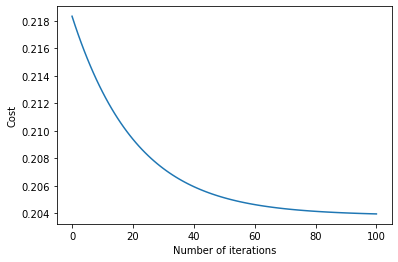

In [8]:
# Set initial parameters
alpha = 0.00005
theta = np.array([-24,0.2,0.2])
n = 100
 # Run
J_vals, theta_vals = gradientDescent(cost, theta, alpha, X, Y, n)
# Plot
plotCostFunction(J_vals)

Now let's define a function to plot what this optimal value of theta looks like as a decision boundary on the data.

In [9]:
# Plot scatter plot with line of best fit defined by theta
def plotWithBestFit(df, theta_min, x_axis, y_axis, label):
    
    pass_df = df[df[label]==1]
    fail_df = df[df[label]==0]
    
    x_1 = df[x_axis].min()
    y_1 = (-1 / theta_min[2]) * ((x_1*theta_min[1]) + theta_min[0])
    x_2 = df[x_axis].max()
    y_2 = (-1 / theta_min[2]) * ((x_2*theta_min[1]) + theta_min[0])

    plt.scatter(pass_df[x_axis], pass_df[y_axis], marker='+', color='black')
    plt.scatter(fail_df[x_axis], fail_df[y_axis], marker='o', color='yellow', edgecolors='black')
    plt.plot([x_1, x_2], [y_1, y_2], color='blue') 
    plt.ylabel(y_axis)
    plt.xlabel(x_axis)

    plt.show()

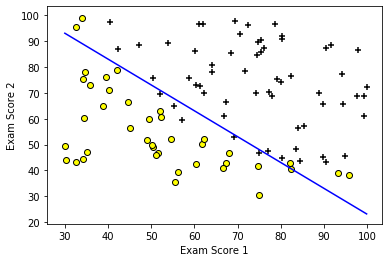

In [10]:
theta_min = theta_vals[100]
theta_min = np.squeeze(np.asarray(theta_min))

plotWithBestFit(df, np.ndarray.tolist(theta_min), 'Exam Score 1', 'Exam Score 2', 'Pass or Fail')

Not too bad for a linear fit. Now let's use *scipy's built in optimization function* to find the optimal value of theta.

With this result we get a cost of: 0.203


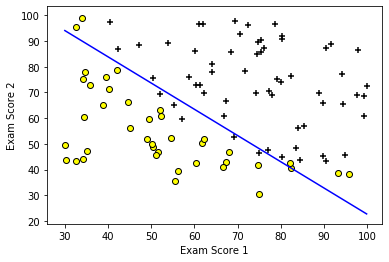

In [11]:
import scipy.optimize as opt

m,n = X_h.shape
theta = np.zeros(n)

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X_h, Y))
print('With this result we get a cost of: {:.3f}'.format(cost(result[0], X_h, Y)))

plotWithBestFit(df, result[0], 'Exam Score 1', 'Exam Score 2', 'Pass or Fail')

### Predict

Now we can use the model to make a prediction, and in turn test how well our model performs in the training dataset.

In [12]:
def _prediction(X, theta):
    prob = sigmoid(X*theta.T)
    return [1 if x >= 0.5 else 0 for x in prob]

def printAccuracy(X, Y, theta):
    theta = np.matrix(theta)
    predictions = _prediction(X, theta)
    correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
    accuracy = (sum(correct) / len(Y)) * 100
    print('accuracy = {:.2f}%'.format(accuracy))
    
printAccuracy(X_h, Y, result[0])

accuracy = 89.00%


## Logistic Regression with Regularization

### Model
For more complex, non-linear, datasets it is clear that a linear decision boundary will not be the most optimal solution. To implement a better solution we can use additional polynomial terms for features within $X$. We must be careful though, as adding too many polynomial terms will lead to overfitting. To prevent the overfitting problem we can include *regularization* within our model.

### Cost Function
The cost function with a regularization term is defined below, where $\lambda$ refers to some regularization constant and $j$ refers to the $j^{th}$ feature in the $\theta$ matrix.
Note here that the sum from $j$ to $n$ starts at 1, indicating that the $j=0$ term does not need regularizing.

\begin{equation*}
J(\theta) = \frac{1}{m} \sum_{i=1}^m [\, -y^{(i)} \log(h_{\theta}(x^{(i)})) + (1+y^{(i)})\log(1-h_{\theta}(x^{(i)})) ]\, + \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^{2}
\end{equation*}

Similarly as before, we can *vectorize* this equation so it can be impleneted efficiently in code, below is the vectorized form.

\begin{equation*}
J(\theta) = \frac{1}{m} \Bigl( -Y^{T}\log{(H)}-(1-Y)^{T}\log{(1-H)}\Bigr) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^{2}
\end{equation*}


### Gradient 
The gradient for $j = 0$ is unchanged from the non-regularized cost function, however for $j \geq 1$ the gradient becomes:

\begin{equation*}
\nabla J(\theta) = \Bigl( \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)} \Bigr) + \frac{\lambda}{m} \theta_{j}
\end{equation*}

In a vectorized form is:

\begin{equation*}
\nabla J(\theta) = \frac{1}{m} X^{T}(H-Y) + \frac{\lambda}{m} \theta
\end{equation*}

**N.B.** Here the 0th element of $\theta$ should not be included in the regularization.

Now let's implement these in code.

In [13]:
def costReg(theta, X, Y, lmbda):
    # Convert theta from numpy.ndarray to matrix
    theta = np.matrix(theta)
    # Get hypothesis
    h = sigmoid(X*theta.T)
    m,n = X.shape
    # Get regularized term

    reg = (lmbda / (2*m)) * (np.sum(np.square(theta[:,1:n])))
    # Calculate cost
    J = ((1/m)*((-Y.T * np.log(h)) - ((1-Y).T * np.log(1-h)))) + reg
    
    return J.item()
    
def gradientReg(theta, X, Y, lmbda):
    # Convert theta from numpy.ndarray to matrix
    theta = np.matrix(theta)
    # Get hypothesis
    h = sigmoid(X*theta.T)
    m,n = X.shape
    # Get regularized term
    reg = (lmbda / m) * (theta.T)
    # Calculate gradient
    grad = ((1/m)* X.T*(h-Y)) + reg
    # Remove regularization from theta 0
    grad[0,0] = grad[0,0] - reg[0,0]

    return grad

### Example

We can now test our regularized implementation. First we should visualize some data.

Here we have data used to determine whether a microchip gets accepted or rejected based on two independent tests. Clearly we cannot use a linear fit to model the decision boundary for this data.

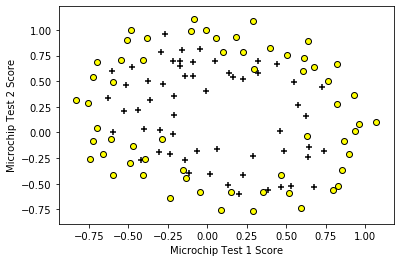

In [14]:
df = pd.read_csv('data/ex2data2.txt',
                 delimiter=',',
                 header=None,
                 names=['Microchip Test 1','Microchip Test 2','Accept or Reject'])
accept_df = df[df['Accept or Reject']==1]
reject_df = df[df['Accept or Reject']==0]
plt.scatter(accept_df['Microchip Test 1'], accept_df['Microchip Test 2'], marker='+', color='black')
plt.scatter(reject_df['Microchip Test 1'], reject_df['Microchip Test 2'], marker='o', color='yellow', edgecolors='black')
plt.ylabel('Microchip Test 2 Score')
plt.xlabel('Microchip Test 1 Score')
plt.show()

### Feature Mapping
In the above dataset we clearly need to fit a non-linear function, with respect to the features, in order to calculate a reasonable decision boundary. To do this we can create more features by a technique known as *feature mapping*, ie including polynomial terms of the features within our model. Let's create a function that will take our features and map all polynomials upto some nth power.

In [15]:
def mapFeatures(X, degree):
    X_p = np.matrix(np.ones(len(X))).T
    for i in range(1, degree+1):
        for j in range(0, i+1):
            x = np.multiply(np.power(X[:,0], i-j),np.power(X[:,1], j))
            X_p = np.append(X_p, x, axis=1)
    return X_p

Now let's test the functions we've made.

In [16]:
# First get the variables into matrix form
X = np.asmatrix(df[['Microchip Test 1','Microchip Test 2']].to_numpy())
Y = np.asmatrix(df['Accept or Reject'].to_numpy())
# Transpose Y so the rows represent the number of training examples
Y = Y.T

# Now map X onto 6 degrees of polynomial
X_m = mapFeatures(X, 6)
m,n = X_m.shape

# Let's initialize theta
theta = np.zeros(n)

# What's the initial cost?
print(costReg(theta=theta, X=X_m, Y=Y, lmbda=1))

0.6931471805599454


We can use the scipy optimization code from earlier to find an optimal decision boundary.

In [17]:
l = 1

result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X_m, Y, l))
print('With this result we get a cost of: {:.3f}'.format(costReg(result[0], X_m, Y, l)))



With this result we get a cost of: 0.529


In [18]:
theta_min = np.matrix(result[0])
printAccuracy(X_m, Y, result[0])

accuracy = 83.05%


Not bad considering the complexity of the data.

Now let's plot the decision boundary to see what it's like

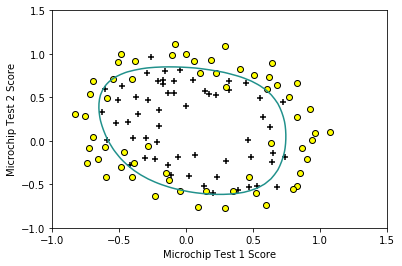

In [19]:
def plotContour(theta):
    
    plt.scatter(accept_df['Microchip Test 1'], accept_df['Microchip Test 2'], marker='+', color='black')
    plt.scatter(reject_df['Microchip Test 1'], reject_df['Microchip Test 2'], marker='o', color='yellow', edgecolors='black')
    plt.ylabel('Microchip Test 2 Score')
    plt.xlabel('Microchip Test 1 Score')
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
    in_u = np.asmatrix(u).T
    in_v = np.asmatrix(v).T

    # Evaluate z = theta*x over the grid
    for i in range(0,len(u)):
        for j in range(0,len(v)):
            some_X = np.hstack((in_u[i,:], in_v[j,:]))
            z[i,j] = mapFeatures(some_X, 6)*theta.T

    # Transpose Z
    z = z.T
    
    plt.contour(u, v, z, 0)
    plt.show()

plotContour(theta_min)